# Imports.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from matplotlib.ticker import PercentFormatter

# Data loads.

In [ ]:
# global variables
PATH='/content/drive/MyDrive/Colab Notebooks/Project/datasets/'

# Google Drive mount
# drive.mount('/content/drive', force_remount=True)

# Loads
dogs_dtypes = {"sex": "category", "breed": "category", "color": "category", "coat": "category", "neutered": "category",
               "housebroken": "category", "likes_people": "category", "likes_children": "category", "get_along_males": "category",
               "get_along_females": "category", "get_along_cats": "category", "keep_in": "category"}
dogs = pd.read_csv(PATH+'ShelterDogs.csv', dtype=dogs_dtypes) #, parse_dates=['dteday'], index_col=0)
adult = pd.read_csv(PATH+'adult.csv') #, parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
reviews = pd.read_csv(PATH+'lasvegas_tripadvisor.csv') #, index_col='INSTNM')
used_cars = pd.read_csv(PATH+'cars.csv') #, parse_dates=['divorce_date'])

In [ ]:
reviews.dtypes

User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars           int64
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object

# Chapter 1. Introduction to Categorical Data

## Course Introduction

### Exercise 1.

**Exploring a target variable**

You have been asked to build a machine learning model to predict whether or not a person makes over $50,000 in a year. To understand the target variable, Above/Below 50k, you decide to explore the variable in more detail.

The Python package pandas will be used throughout this course and will be loaded as pd throughout. The adult census income dataset, adult, has also been preloaded for you.

* Explore the Above/Below 50k variable by printing out a description of the variable's contents.
* Explore the Above/Below 50k variable by printing out a frequency table of the values found in this column.
* Rerun .value_counts(), but this time print out the relative frequency values instead of the counts.

In [ ]:
# Explore the Above/Below 50k variable
print(adult["Above/Below 50k"].describe())

# Print a frequency table of "Above/Below 50k"
print(adult["Above/Below 50k"].value_counts())

# Print relative frequency values
print(adult["Above/Below 50k"].value_counts(normalize=True))

count      32561
unique         2
top        <=50K
freq       24720
Name: Above/Below 50k, dtype: object
 <=50K    24720
 >50K      7841
Name: Above/Below 50k, dtype: int64
 <=50K    0.75919
 >50K     0.24081
Name: Above/Below 50k, dtype: float64


## Categorical data in pandas

### Exercise 1.

**Setting dtypes and saving memory**

A colleague of yours is exploring a list of occupations and how they relate to salary. She has given you a list of these occupations, list_of_occupations, and has a few simple questions such as "How many different titles are there?" and "Which position is the most common?".

* Create a pandas Series, series1, using the list_of_occupations (do not set the dtype).
* Print both the data type and number of bytes used of this new Series.
* Create a second pandas Series, series2, using the list_of_occupations and set the dtype to "category".
* Print both the data type and number of bytes used of this new Series.

In [ ]:
# Data preparation
list_of_occupations = adult['Occupation']

In [ ]:
# Create a Series, default dtype
series1 = pd.Series(list_of_occupations)

# Print out the data type and number of bytes for series1
print("series1 data type:", series1.dtype)
print("series1 number of bytes:", series1.nbytes)

# Create a Series, "category" dtype
series2 = pd.Series(list_of_occupations, dtype="category")

# Print out the data type and number of bytes for series2
print("series2 data type:", series2.dtype)
print("series2 number of bytes:", series2.nbytes)

series1 data type: object
series1 number of bytes: 260488
series2 data type: category
series2 number of bytes: 32681


### Exercise 2.

**Creating a categorical pandas Series**

Another colleague at work has collected information on the number of "Gold", "Silver", and "Bronze" medals won by the USA at the Summer & Winter Olympics since 1896. She has provided this as a list, medals_won. Before taking a look at the total number of each medal won, you want to create a categorical pandas Series. However, you know that these medals have a specific order to them and that Gold is better than Silver, but Silver is better than Bronze. Use the object, medals_won, to help.

* Create a categorical pandas Series without using pd.Series().
* Specify the three known medal categories such that "Bronze" < "Silver" < "Gold".
* Specify that the order of the categories is important when creating this Series.

In [ ]:
# Create a categorical Series and specify the categories (let pandas know the order matters!)
#medals = pd.Categorical(medals_won, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
#print(medals)

### Exercise 3.

**Setting dtype when reading data**

You are preparing to create a machine learning model to predict a person's income category using the adult census income dataset. You don't have access to any cloud resources and you want to make sure that your laptop will be able to load the full dataset and process its contents. You have read in the first five rows of the dataset adult to help you understand what kind of columns are available.

* Call the correct attribute on the adult DataFrame to review the data types.
* Create a dictionary with keys: "Workclass", "Education", "Relationship", and "Above/Below 50k".
* Set the value for each key to be "category"
* Use the newly created dictionary, adult_dtypes, when reading in adult.csv

In [ ]:
# Check the dtypes
print(adult.dtypes)

# Create a dictionary with column names as keys and "category" as values
adult_dtypes = {
   "Workclass": "category",
   "Education": "category",
   "Relationship": "category",
   "Above/Below 50k": "category"
}

# Read in the CSV using the dtypes parameter
adult2 = pd.read_csv(
  PATH+"adult.csv",
  dtype=adult_dtypes
)
print(adult2.dtypes)

Age                 int64
Workclass          object
fnlgwt              int64
Education          object
Education Num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Country            object
Above/Below 50k    object
dtype: object
Age                   int64
Workclass          category
fnlgwt                int64
Education          category
Education Num         int64
Marital Status       object
Occupation           object
Relationship       category
Race                 object
Sex                  object
Capital Gain          int64
Capital Loss          int64
Hours/Week            int64
Country              object
Above/Below 50k    category
dtype: object


## Grouping data by category in pandas

### Exercise 1.

**Create lots of groups**

You want to find the mean Age of adults when grouping by the following categories:

* "Workclass" (which has 9 categories)
* "Above/Below 50k" (which has 2 categories)
* "Education" (which has 16 categories).

You have developed the following bit of code:

> gb = adult.groupby(by=[ "Workclass",  
                        "Above/Below 50k",   
                        "Education"])  

* Question: How many groups are in the gb object and what is the maximum possible number of groups that could have been created? The dataset adult, and the gb object have been preloaded for you.
* Answer: 208 are created out of 288 possible groups.

In [ ]:
adult.groupby(by=[ "Workclass", "Above/Below 50k", "Education"]).size()

Workclass     Above/Below 50k  Education    
 ?             <=50K            10th             98
                                11th            118
                                12th             38
                                1st-4th          12
                                5th-6th          28
                                               ... 
 State-gov     >50K             Some-college     31
 Without-pay   <=50K            7th-8th           1
                                Assoc-acdm        1
                                HS-grad           9
                                Some-college      3
Length: 208, dtype: int64

### Exercise 2.

**Setting up a .groupby() statement**

The gender wage gap is a hot-topic item in the United States and across the world. Using the adult census income dataset, loaded as adult, you want to check if some of the recently published data lines up with this income survey.

* Split the adult dataset across the "Sex" and "Above/Below 50k" columns, saving this object as gb.
* Print out the number of observations found in each group.
* Using gb, find the average of each numerical column.

In [ ]:
# Group the adult dataset by "Sex" and "Above/Below 50k"
gb = adult.groupby(by=['Sex', 'Above/Below 50k'])

# Print out how many rows are in each created group
print(gb.size())

# Print out the mean of each group for all columns
print(gb.mean())

Sex      Above/Below 50k
 Female   <=50K              9592
          >50K               1179
 Male     <=50K             15128
          >50K               6662
dtype: int64
                               Age         fnlgwt  Education Num  \
Sex     Above/Below 50k                                            
 Female  <=50K           36.210801  185999.381359       9.820475   
         >50K            42.125530  183687.406277      11.787108   
 Male    <=50K           37.147012  193093.609268       9.452142   
         >50K            44.625788  188769.101321      11.580606   

                         Capital Gain  Capital Loss  Hours/Week  
Sex     Above/Below 50k                                          
 Female  <=50K             121.986134     47.364470   35.916701  
         >50K             4200.389313    173.648855   40.426633  
 Male    <=50K             165.723823     56.806782   40.693879  
         >50K             3971.765836    198.780396   46.366106  


<ipython-input-10-37a06cb2cdac>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(gb.mean())


### Exercise 3.

**Using pandas functions effectively**

You are creating a Python application that will calculate summary statistics based on user-selected variables. The complete dataset is quite large. For now, you are setting up your code using part of the dataset, preloaded as adult. As you create a reusable process, make sure you are thinking through the most efficient way to setup the GroupBy object.

* Create a list of the names for two user-selected variables: "Education" and "Above/Below 50k".
* Create a GroupBy object, gb, using the user_list as the grouping variables.
* Calculate the mean of "Hours/Week" across each group using the most efficient approach covered in the video.

In [ ]:
# Create a list of user-selected variables
user_list = ['Education', 'Above/Below 50k']

# Create a GroupBy object using this list
gb = adult.groupby(by=user_list)

# Find the mean for the variable "Hours/Week" for each group - Be efficient!
print(gb['Hours/Week'].mean())

Education      Above/Below 50k
 10th           <=50K             36.574053
                >50K              43.774194
 11th           <=50K             33.322870
                >50K              45.133333
 12th           <=50K             35.035000
                >50K              44.818182
 1st-4th        <=50K             37.864198
                >50K              48.833333
 5th-6th        <=50K             38.539432
                >50K              46.000000
 7th-8th        <=50K             38.830033
                >50K              47.500000
 9th            <=50K             37.667351
                >50K              44.851852
 Assoc-acdm     <=50K             39.264339
                >50K              44.256604
 Assoc-voc      <=50K             40.817826
                >50K              43.853186
 Bachelors      <=50K             40.586152
                >50K              45.475462
 Doctorate      <=50K             45.429907
                >50K              47.513072
 

# Chapter 2. Categorical pandas Series

## Setting category variables

### Exercise 1.

**Adding categories**

The owner of a local dog adoption agency has listings for almost 3,000 dogs. One of the most common questions they have been receiving lately is: "What type of area was the dog previously kept in?". You are setting up a pipeline to do some analysis and want to look into what information is available regarding the "keep_in" variable. Both pandas, as pd, and the dogs dataset have been preloaded.

* Print the frequency of the responses in the "keep_in" variable and make sure the count of NaN values are shown.
* Convert the "keep_in" variable to a categorical Series.
* Add the list of new categories provided by the adoption agency, new_categories, to the "keep_in" column.
* Print the frequency counts of the keep_in column and do not drop NaN values.

In [ ]:
# Check frequency counts while also printing the NaN count
print(dogs["keep_in"].value_counts(dropna=False))

# Switch to a categorical variable
dogs["keep_in"] = dogs["keep_in"].astype("category")

# Add new categories
new_categories = ["Unknown History", "Open Yard (Countryside)"]
dogs["keep_in"] = dogs["keep_in"].cat.add_categories(new_categories)

# Check frequency counts one more time
print(dogs["keep_in"].value_counts(dropna=False))

both flat and garden    1224
NaN                     1021
garden                   510
flat                     182
Name: keep_in, dtype: int64
both flat and garden       1224
NaN                        1021
garden                      510
flat                        182
Unknown History               0
Open Yard (Countryside)       0
Name: keep_in, dtype: int64


### Exercise 2.

**Removing categories**

Before adopting dogs, parents might want to know whether or not a new dog likes children. When looking at the adoptable dogs dataset, dogs, you notice that the frequency of responses for the categorical Series "likes_children" looks like this:

> maybe     1718  
yes       1172  
no          47

The owner of the data wants to convert all "maybe" responses to "no", as it would be unsafe to let a family adapt a dog if it doesn't like children. The code to convert all "maybe" to "no" is provided in Step 1. However, the option for "maybe" still remains as a category.

* Print out the categories of the categorical Series dogs["likes_children"].
* Print out the frequency table for "likes_children" to see if any "maybe" responses remain.
* Remove the "maybe" category from the Series.
* Print out the categories of "likes_children" one more time.

In [ ]:
# Set "maybe" to be "no"
dogs.loc[dogs["likes_children"] == "maybe", "likes_children"] = "no"

# Print out categories
print(dogs["likes_children"].cat.categories)

# Print the frequency table
print(dogs["likes_children"].value_counts())

# Remove the `"maybe" category
#dogs["likes_children"] = dogs["likes_children"].cat.remove_categories(["maybe"])
print(dogs["likes_children"].value_counts())

# Print the categories one more time
print(dogs["likes_children"].cat.categories)

Index(['no', 'yes'], dtype='object')
yes    1172
no       47
Name: likes_children, dtype: int64
yes    1172
no       47
Name: likes_children, dtype: int64
Index(['no', 'yes'], dtype='object')


## Updating categories

### Exercise 1.

**Renaming categories**

The likes_children column of the adoptable dogs dataset needs an update. Here are the current frequency counts:

> Maybe?    1718  
yes       1172  
no          47

Two things that stick out are the differences in capitalization and the ? found in the Maybe? category. The data should be cleaner than this and you are being asked to make a few changes.

* Create a dictionary called my_changes that will update the Maybe? category to Maybe.
* Rename the categories in likes_children using the my_changes dictionary.
* Update the categories one more time so that all categories are uppercase using the .upper() method.
* Print out the categories of the updated likes_children Series.

In [ ]:
# Create the my_changes dictionary
my_changes = {'Maybe?':'Maybe'} #no such category in the DataFrame.

# Rename the categories listed in the my_changes dictionary
dogs["likes_children"] = dogs["likes_children"].cat.rename_categories(my_changes)

# Use a lambda function to convert all categories to uppercase using upper()
dogs["likes_children"] =  dogs["likes_children"].cat.rename_categories(lambda c: c.upper())

# Print the list of categories
print(dogs["likes_children"].cat.categories)

Index(['NO', 'YES'], dtype='object')


### Exercise 2.

**Collapsing categories**

One problem that users of a local dog adoption website have voiced is that there are too many options. As they look through the different types of dogs, they are getting lost in the overwhelming amount of choice. To simplify some of the data, you are going through each column and collapsing data if appropriate. To preserve the original data, you are going to make new updated columns in the dogs dataset. You will start with the coat column. The frequency table is listed here:

> short          1969  
medium          565  
wirehaired      220  
long            180  
medium-long       3

* Create a dictionary named update_coats to map both wirehaired and medium-long to medium.
* Collapse the categories listed in this new dictionary and save this as a new column, coat_collapsed.
* Convert this new column into a categorical Series.
* Print the frequency table of this new Series.

In [ ]:
# Create the update_coats dictionary
update_coats = {"wirehaired": "medium", "medium-long":"medium"}

# Create a new column, coat_collapsed
dogs["coat_collapsed"] = dogs['coat'].replace(update_coats)

# Convert the column to categorical
dogs["coat_collapsed"] = dogs["coat_collapsed"].astype('category')

# Print the frequency table
print(dogs["coat_collapsed"].value_counts())

short     1972
medium     785
long       180
Name: coat_collapsed, dtype: int64


## Reordering categories

### Exercise 1.

**Reordering categories in a Series**

The owner of a local dog adoption agency has asked you take a look at her data on adoptable dogs. She is specifically interested in the size of the dogs in her dataset and wants to know if there are differences in other variables, given a dog's size. The adoptable dogs dataset has been loaded as dogs and the "size" variable has already been saved as a categorical column.

* Print out the current categories of the "size" pandas Series.
* Reorder categories in the "size" column using the categories "small", "medium", "large", do not set the ordered parameter.
* Update the reorder_categories() method so that pandas knows the variable has a natural order.
* Add a argument to the method so that the "size" column is updated without needing to save it to itself.

In [ ]:
dogs['size'] = dogs['size'].astype('category')
dogs.dtypes
dogs.head()

,ID,name,age,sex,breed,date_found,adoptable_from,posted,color,coat,size,neutered,housebroken,likes_people,likes_children,get_along_males,get_along_females,get_along_cats,keep_in,coat_collapsed
0,23807,Gida,0.25,female,Unknown Mix,12/10/19,12/11/19,12/11/19,red,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
1,533,Frida És Ricsi,0.17,female,Unknown Mix,12/1/19,12/1/19,12/9/19,black and white,short,small,no,NaN,yes,YES,yes,yes,yes,NaN,short
2,23793,NaN,4.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,saddle back,short,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
3,23795,NaN,1.00,male,Unknown Mix,12/8/19,12/23/19,12/8/19,yellow-brown,medium,medium,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
4,23806,Amy,2.00,female,French Bulldog Mix,12/10/19,12/11/19,12/11/19,black,short,small,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short


In [ ]:
# Print out the current categories of the size variable
print(dogs["size"].cat.categories)

# Reorder the categories, specifying the Series is ordinal, and overwriting the original series
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

Index(['large', 'medium', 'small'], dtype='object')


<ipython-input-17-80fb21c6fe2e>:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  dogs["size"].cat.reorder_categories(


### Exercise 2.

**Using .groupby() after reordering**

It is now time to run some analyses on the adoptable dogs dataset that is focused on the "size" of the dog. You have already developed some code to reorder the categories. In this exercise, you will develop two similar .groupby() statements to help better understand the effect of "size" on other variables. dogs has been preloaded for you.

* Print out the frequency table of "sex" for each category of the "size" column.
* Print out the frequency table of "keep_in" for each category of the "size" column.

In [ ]:
# Previous code
dogs["size"].cat.reorder_categories(
  new_categories=["small", "medium", "large"],
  ordered=True,
  inplace=True
)

# How many Male/Female dogs are available of each size?
print(dogs.groupby('size')['sex'].value_counts())

# Do larger dogs need more room to roam?
print(dogs.groupby('size')['keep_in'].value_counts())

size    sex   
small   male       260
        female     214
medium  male      1090
        female     854
large   male       331
        female     188
Name: sex, dtype: int64
size    keep_in                
small   both flat and garden       238
        flat                        80
        garden                      21
        Unknown History              0
        Open Yard (Countryside)      0
medium  both flat and garden       795
        garden                     317
        flat                        97
        Unknown History              0
        Open Yard (Countryside)      0
large   both flat and garden       191
        garden                     172
        flat                         5
        Unknown History              0
        Open Yard (Countryside)      0
Name: keep_in, dtype: int64


<ipython-input-18-8b8ad19a9303>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  dogs["size"].cat.reorder_categories(


## Cleaning and accessing data

### Exercise 1.

**Cleaning variables**

Users of an online entry system used to have the ability to freely type in responses to questions. This is causing issues when trying to analyze the adoptable dogs dataset, dogs. Here is the current frequency table of the "sex" column:

> male      1672  
female    1249  
 MALE        10  
 FEMALE       5  
Malez        1

Now that the system only takes responses of "female" and "male", you want this variable to match the updated system.

* Update the misspelled response "Malez" to be "male" by creating the replacement map, replace_map.
* Replace all occurrences of "Malez" with "male" by using replace_map.
* Remove the leading spaces of the " MALE" and " FEMALE" responses.
* Convert all responses to be strictly lowercase.
* Convert the "sex" column to a categorical pandas Series.

In [ ]:
# Fix the misspelled word
replace_map = {"Malez": "male"}

# Update the sex column using the created map
dogs["sex"] = dogs["sex"].replace(replace_map)

# Strip away leading whitespace
dogs["sex"] = dogs["sex"].str.strip()

# Make all responses lowercase
dogs["sex"] = dogs["sex"].str.lower()

# Convert to a categorical Series
dogs["sex"] = dogs["sex"].astype('category')

print(dogs["sex"].value_counts())

male      1681
female    1256
Name: sex, dtype: int64


### Exercise 2.

**Accessing and filtering data**

You are working on a Python application to display information about the dogs available for adoption at your local animal shelter. Some of the variables of interest, such as "breed", "size", and "coat", are saved as categorical variables. In order for this application to work properly, you need to be able to access and filter data using these columns.

The ID variable has been set as the index of the pandas DataFrame dogs.

* Print the "coat" value for the dog with an ID of 23807.
* For dogs with a long "coat", print the number of each "sex".
* Print the average age of dogs with a "breed" of "English Cocker Spaniel".
* Filter to the dogs with "English" in their "breed" name using the .contains() method.

In [ ]:
dogs['ID'] = dogs['ID'].astype(np.int64)
dogs.set_index('ID', inplace=True)

In [ ]:
# Print the category of the coat for ID 23807
print(dogs.loc[23807, 'coat'])

# Find the count of male and female dogs who have a "long" coat
print(dogs.loc[dogs['coat'] == 'long', 'sex'].value_counts())

# Print the mean age of dogs with a breed of "English Cocker Spaniel"
print(dogs.loc[dogs['breed'] == 'English Cocker Spaniel', 'age'].mean())

# Count the number of dogs that have "English" in their breed name
print(dogs[dogs["breed"].str.contains('English', regex=False)].shape[0])

short
male      124
female     56
Name: sex, dtype: int64
8.186153846153847
35


# Chapter 3. Visualizing Categorical Data

## Introduction to categorical plots using Seaborn

### Exercise 1.

**Creating a box plot**

When people leave reviews for products, services, or destinations, people reading those reviews can sometimes mark the original review as helpful. If enough people mark the review as helpful, future readers of these reviews might be more likely to trust the content of the original review.

Using the reviews dataset, explore the continuous variable "Helpful votes" across the different categories found in the "Traveler type" variable.

Note that for the remainder of this chapter, seaborn as sns and matplotlib.pyplot as plt will be preloaded for you.

* Set the font size of your graphic to be 1.25.
* Set the background of the graphic to be "darkgrid".
* Create a boxplot using catplot() with "Helpful votes" as the continuous variable split across each "Traveler type". Make sure that you are using the reviews dataset.

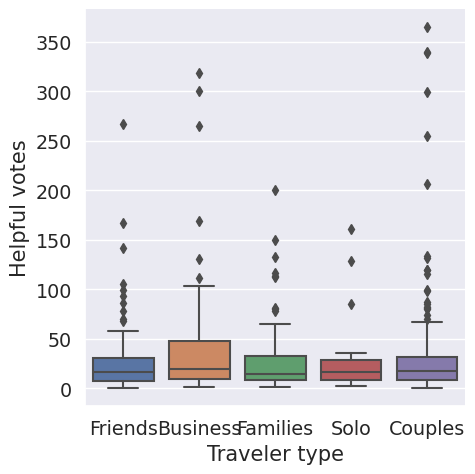

In [ ]:
# Set the font size to 1.25
sns.set(font_scale=1.25)

# Set the background to "darkgrid"
sns.set_style('darkgrid')

# Create a boxplot
sns.catplot(data=reviews, x='Traveler type', y="Helpful votes", kind='box')

plt.show()

## Seaborn bar plots

### Exercise 1.

**Creating a bar plot**

Las Vegas hotels are seeing large variations in how helpful reviews appear to other people. The owners of these hotels are curious if there are times of the year when reviews have been more helpful to their potential guests. Help the owners understand their reviews better by creating a bar plot of the average number of helpful votes per review across the categorical variable "Period of stay". The dataset reviews has been preloaded for you.

* Print out the frequency counts of the variable "Period of stay" to make sure each category has data.
* Create a bar plot using catplot().
* Split the reviews dataset on "Period of stay" across the x-axis.
* Specify the numerical variable to aggregate on as "Helpful votes".

Mar-May    128
Jun-Aug    126
Sep-Nov    126
Dec-Feb    124
Name: Period of stay, dtype: int64


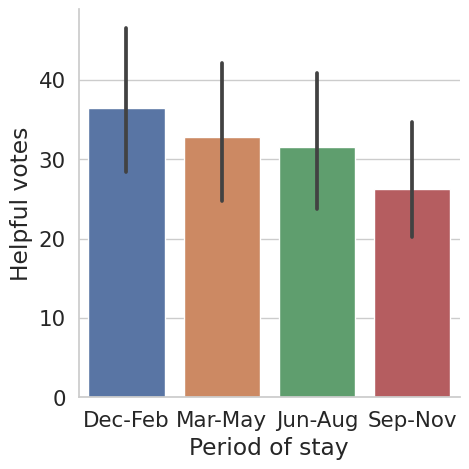

In [ ]:
# Print the frequency counts of "Period of stay"
print(reviews["Period of stay"].value_counts())

sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Create a bar plot of "Helpful votes" by "Period of stay"
sns.catplot(kind='bar', data=reviews, y="Helpful votes", x='Period of stay')
plt.show()

### Exercise 2.

**Ordering categories**

Not all categories are created equal. In the hotel review dataset, reviews, hotel owners know that most of their customers are from North America. When visualizing data broken out by "User continent" they might want North America to appear first. An ordered list of user continents has been provided as continent_categories. In this exercise, you will work through preparing a visualization that is ordered by the frequency counts of a Series.

* Create a bar chart with "User continent" along the x-axis and "Score" along the y-axis.
* Print out the frequency counts of "User continent".
* Convert the "User continent" Series to a categorical and create a bar plot with "User continent" along the x-axis.
* Reorder the "User continent" Series using the ordered list, continent_categories, and rerun the graphic.

North America    295
Europe           118
Oceania           41
Asia              36
Africa             7
South America      7
Name: User continent, dtype: int64


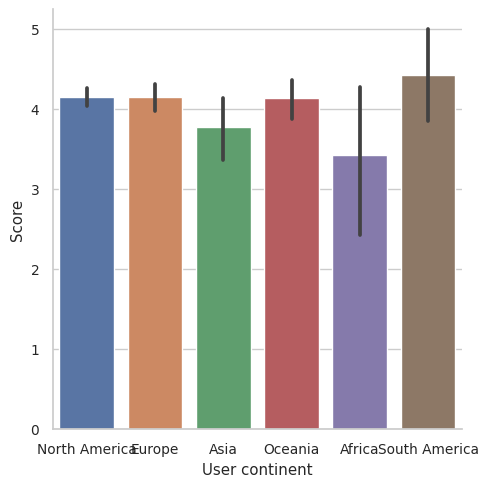

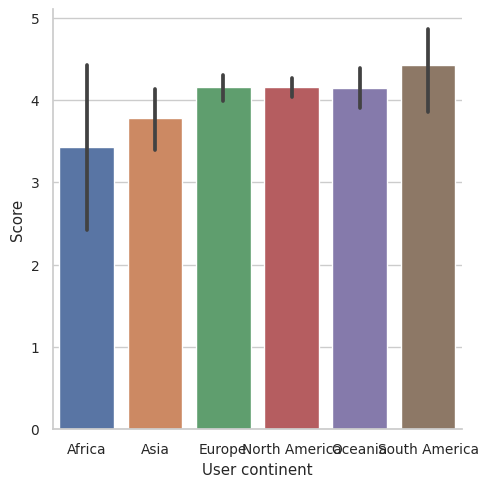

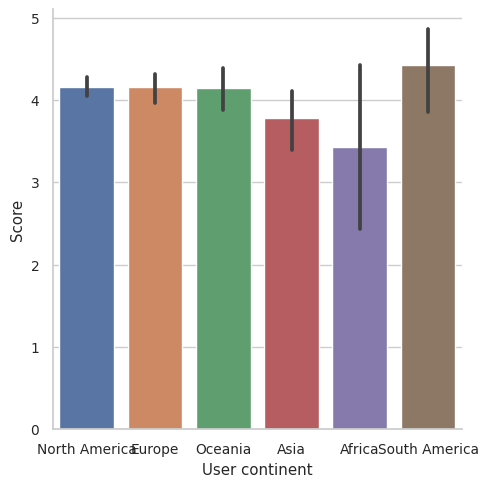

In [ ]:
# Create a bar chart
sns.set(font_scale=.9)
sns.set_style("whitegrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")

# Print the frequency counts for "User continent"
print(reviews["User continent"].value_counts())

# Convert "User continent" to a categorical variable
reviews["User continent"] = reviews["User continent"].astype('category')
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

# Reorder "User continent" using continent_categories and rerun the graphic
continent_categories = list(reviews["User continent"].value_counts().index)
reviews["User continent"] = reviews["User continent"].cat.reorder_categories(new_categories=continent_categories)
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar")
plt.show()

### Exercise 3.

**Bar plot using hue**

Aggregating information across multiple categories is often necessary to help stakeholders better understand their data. In preparation for building a dashboard that will allow users to select up to two variables when creating visualizations, you want to test visualizations that use different combinations of categorical variables using a bar plot.

* Update the plot so that "Casino" (along the x-axis) and "Free internet" (to color the bars) are used to split the data.
* Switch the categories so that "Free internet" is on the x-axis and "Casino" is in the legend.
* Update the x parameter to be "User continent".
* The font was too large for the last visualization - change the font size to 1.0.

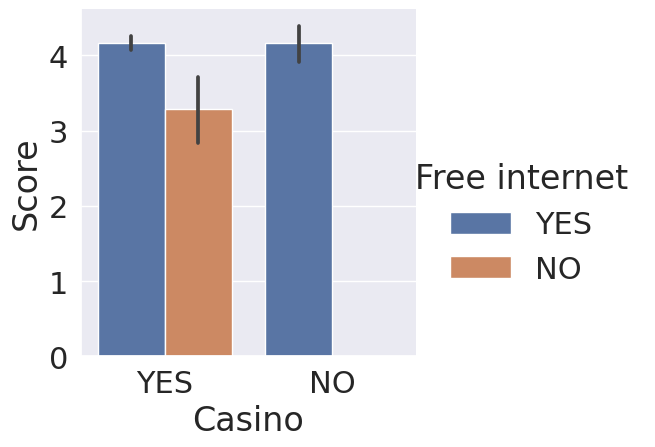

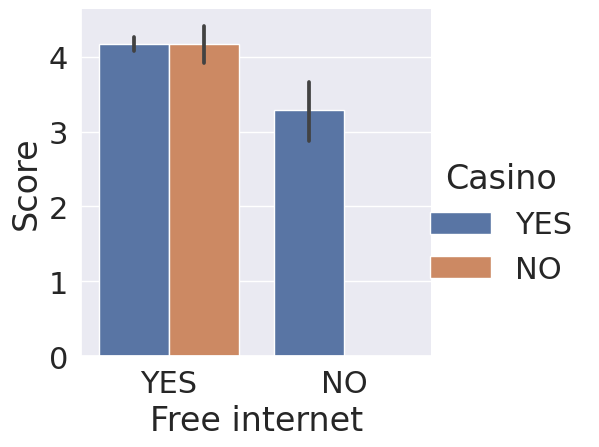

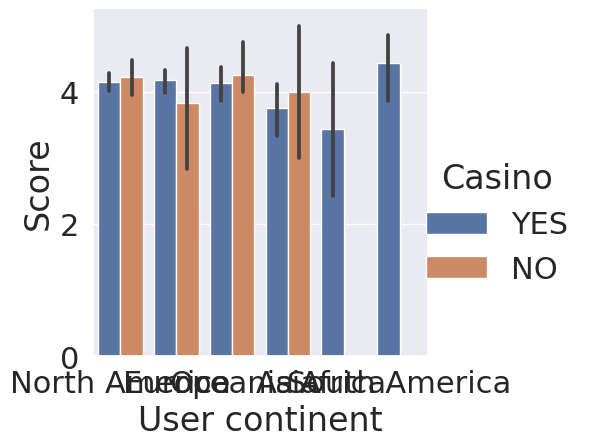

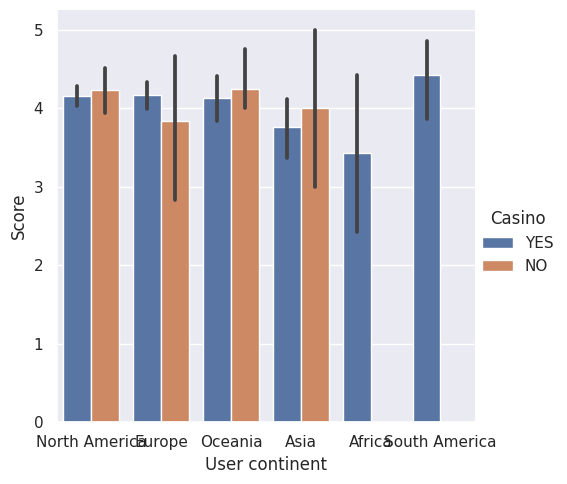

In [ ]:
# Add a second category to split the data on: "Free internet"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Casino", y="Score", data=reviews, kind="bar", hue="Free internet")
plt.show()

# Switch the x and hue categories
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="Free internet", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

# Update x to be "User continent"
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

# Lower the font size so that all text fits on the screen.
sns.set(font_scale=1)
sns.set_style("darkgrid")
sns.catplot(x="User continent", y="Score", data=reviews, kind="bar", hue="Casino")
plt.show()

## Point and count plots

### Exercise 1.

**Creating a point plot**

Creating helpful visualizations sometimes requires a lot of testing. You have been asked to create a visualization that shows the number of reviews, "Nr. reviews", which is the number of reviews a reviewer has previously written, across a hotel's star rating, "Hotel stars". Since the number of reviews is numerical, you have decided to use a point plot to show the mean of the data across the categories.

* Using the catplot() function, create a point plot.
* Split the data across the x-axis using "Hotel stars".
* Specify the numerical variable to visualize to "Nr. reviews".
* Update the arguments so that any lines that appear do not overlap.

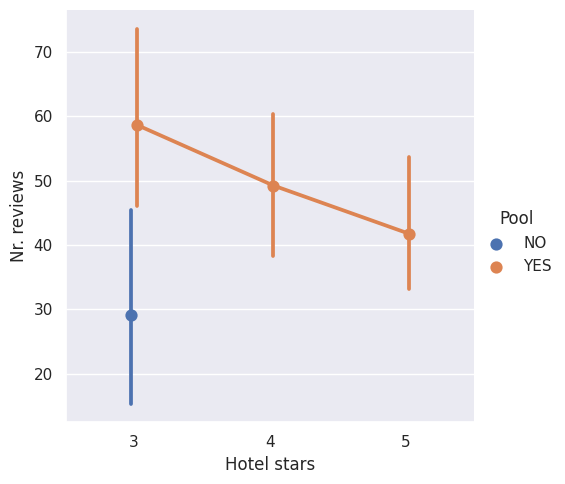

In [ ]:
# Create a point plot with catplot using "Hotel stars" and "Nr. reviews"
sns.catplot(
  # Split the data across Hotel stars and summarize Nr. reviews
  x="Hotel stars",
  y="Nr. reviews",
  data=reviews,
  # Specify a point plot
  kind='point',
  hue="Pool",
  # Make sure the lines and points don't overlap
  dodge=True
)
plt.show()

### Exercise 2.

**Creating a count plot**

When creating quick analysis of frequency counts, you have been using .value_counts(). This is a great way for you to see the counts and get an idea of which categories are present in the data. However, sending frequency tables to clients or coworkers may not always be a good idea. For this exercise, you will visualize the number of reviews by their "Score". Although "Score" has been used as a numerical variable in the past, it can be used as a categorical variable given that it has five unique values that are ordered from worst to best. The reviews dataset has been preloaded.

* Use the catplot() function to display count frequencies using the reviews dataset.
* Count the frequencies for the "Score" variable across the x-axis.
* When counting the frequencies, color the bars using the "Traveler type" column.

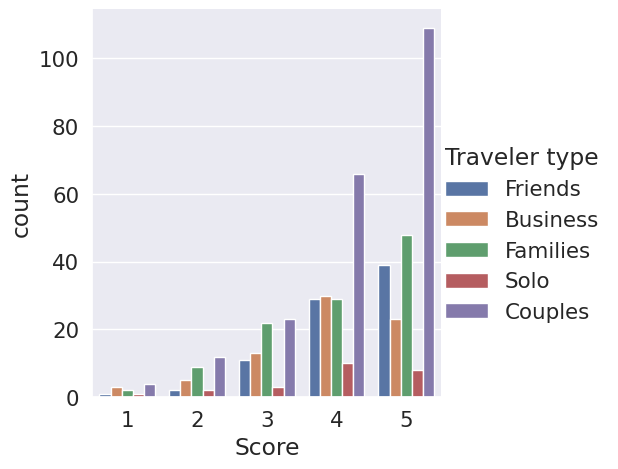

In [ ]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  data=reviews,
  x='Score',
  hue="Traveler type",
  kind='count'
)
plt.show()

## Additional catplot() options

### Exercise 1.

**One visualization per group**

While working on a data exploration project, you have been asked to visualize the number of reviews of hotels by "Period of stay" and by the day of the week, "Review weekday". The goal of this visualization is to see what day of the week has the most reviews for each of the four periods of stay. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.

* Create a catplot() using "count" as the type of graphic.
* Count the number of reviews by "Review weekday".
* Create individual plots for each "Period of stay".
* Wrap the plots after every 2nd graphic.

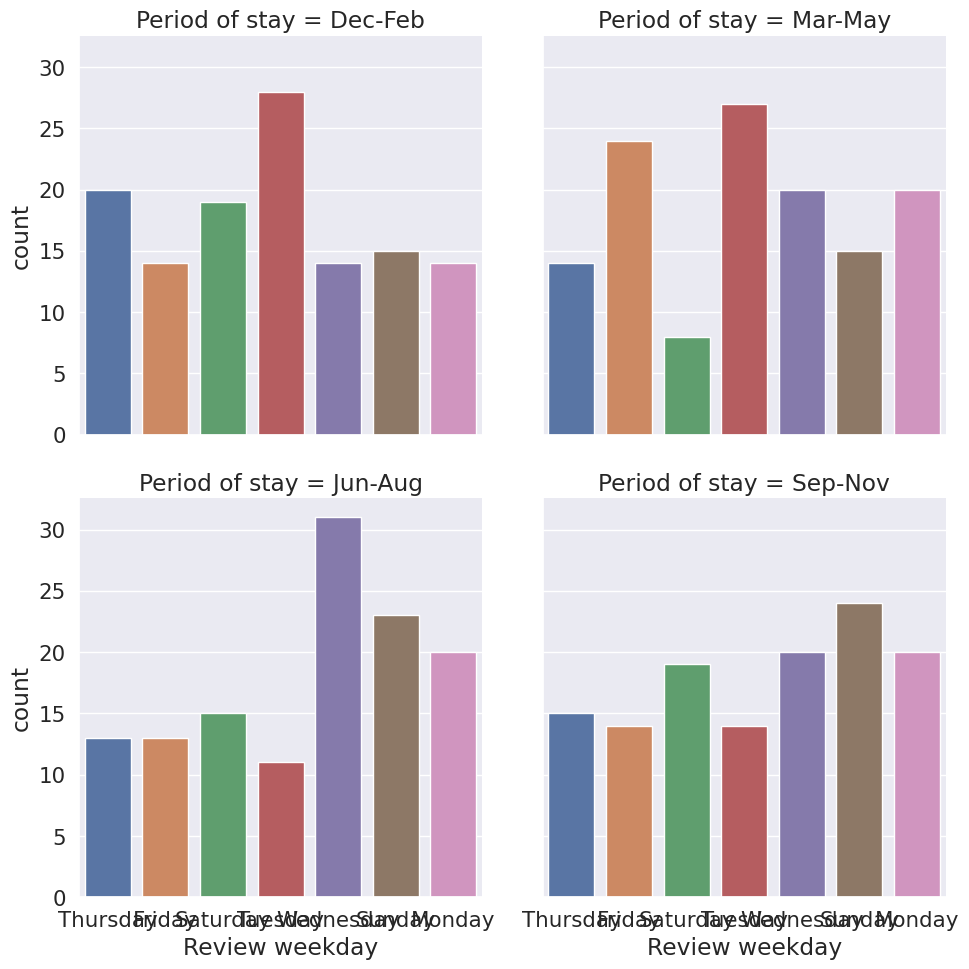

In [ ]:
# Create a catplot for each "Period of stay" broken down by "Review weekday"
ax = sns.catplot(
  # Make sure Review weekday is along the x-axis
  kind='count',
  # Specify Period of stay as the column to create individual graphics for
  x="Review weekday",
  # Specify that a count plot should be created
  col="Period of stay",
  # Wrap the plots after every 2nd graphic.
  col_wrap=2,
  data=reviews
)
plt.show()

### Exercise 2.

**Updating categorical plots**

Hotels are constantly working to get better reviews from their customers. A hotel chain has asked you to create visualizations to help the company understand why people might provide various ratings after staying at their hotels. A manager has asked if hotels with "Free internet" receive higher reviews given the "Traveler type".

Creating visualizations is an iterative process. In this exercise, you will start with a basic graphic and iteratively add features until you have a finished product. The reviews dataset has been preloaded for you, as well as both seaborn, as sns, and matplotlib.pyplot as plt.

* Adjust the color of the plot to be seaborn's "Set2" palette.
* Add the title "Hotel Score by Traveler Type and Free Internet Access".
* Update the axis labels to be "Free Internet" for the x-axis and "Average Review Rating" for the y-axis.
* Adjust the starting height of the graphic to be 93% of the full visualization height.

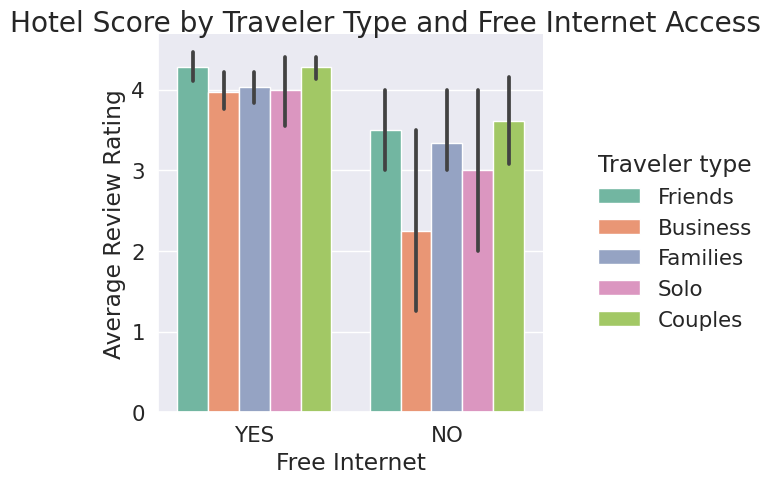

In [ ]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=.93)
plt.show()

# Chapter 4. Pitfalls and encoding

## Categorical pitfalls

### Exercise 1.

**Memory usage knowledge check**

Using categorical pandas Series can save a lot of memory, sometimes as much as 90% of the original columns memory usage. If each of the columns listed is converted to a categorical Series, which column will save the most memory? The used_cars dataset has been loaded for you.

* price_usd
* drivetrain <--
* model_name

In [ ]:
print(used_cars['price_usd'].astype('category').nbytes/used_cars['price_usd'].nbytes)
print(used_cars['drivetrain'].astype('category').nbytes/used_cars['drivetrain'].nbytes)
print(used_cars['model_name'].astype('category').nbytes/used_cars['model_name'].nbytes)

0.3194765253951364
0.12507785938594898
0.27901559783031843


### Exercise 2.

**Overcoming pitfalls: string issues**

Being able to effectively use categorical pandas Series is an important skill to have in your toolbelt. Unfortunately, there are several common problems that you may run into when using these Series.

In this exercise, you will work through code from a previous exercise on updating a categorical Series. Follow the instructions to make sure everything goes smoothly. The used cars dataset, used_cars, is loaded for you.

* Print the frequency table of the "body_type" column for used_cars and include NaN values.
* Update the .loc statement so that all NaN values in "body_type" are set to "other".
* Convert the "body_type" column to title case.
* Check the dtype of the "body_type" column.

In [ ]:
# Print the frequency table of body_type and include NaN values
print(used_cars["body_type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["body_type"].isna(), "body_type"] = "other"

# Convert body_type to title case
used_cars["body_type"] = used_cars["body_type"].str.title()

# Check the dtype
print(used_cars["body_type"].dtype)

sedan        13011
hatchback     7644
universal     5507
suv           5164
minivan       3608
minibus       1369
van            808
coupe          652
liftback       552
pickup         129
cabriolet       75
limousine       12
Name: body_type, dtype: int64
object


### Exercise 3.

**Overcoming pitfalls: using NumPy arrays**

A local used car company manually appraises each car that they add to their inventory. When a new car comes in, they select from a drop-down menu, giving the car a rating between 1 and 5. A 1 means that the car probably won't sell as is, but a 5 indicates the car will definitely sell without a problem.

With over 38,000 cars in their inventory, the company has asked you to give them an average "sellability" of their cars. For this exercise, use the used_cars dataset. The column of interest is called "Sale Rating" and it is currently a categorical column.

* Print the frequency table of the "Sale Rating" column of the used_cars dataset.
* Correct the second statement by converting the column to type int before calling .mean().

In [ ]:
# Data preparation
used_cars["Sale Rating"] = np.random.randint(3, 6, used_cars.shape[0])

In [ ]:
# Print the frequency table of Sale Rating
print(used_cars["Sale Rating"].value_counts())

# Find the average score
average_score = used_cars["Sale Rating"].astype(int).mean()

# Print the average
print(average_score)

4    12930
3    12815
5    12786
Name: Sale Rating, dtype: int64
3.9992473592691598


## Label encoding

### Exercise 1.

**Create a label encoding and map**

A used car company believes that they can predict a car's sales price reasonably well using their used_cars dataset. One of the variables they want to use, "color", needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.

* Convert the color column to a categorical Series.
* Create a new column, "color_code", by creating a label encoding for the variable "color".
* Before you forget which codes belong to which categories, create a color map using the codes and categories objects.
* Print the new color map to see which codes map to which categories.

In [ ]:
# Convert to categorical and print the frequency table
used_cars["color"] = used_cars["color"].astype("category")
print(used_cars["color"].value_counts())

# Create a label encoding
used_cars["color_code"] = used_cars["color"].cat.codes

# Create codes and categories objects
codes = used_cars["color"].cat.codes
categories = used_cars["color"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64
{8: 'silver', 1: 'blue', 7: 'red', 0: 'black', 4: 'grey', 6: 'other', 2: 'brown', 10: 'white', 3: 'green', 9: 'violet', 5: 'orange', 11: 'yellow'}


### Exercise 2.

**Using saved mappings**

You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (color_map, fuel_map, and transmission_map) that will map these columns back to their original categorical names. The dataset used_cars_updated has been preloaded. A preview of the dataset is shown. Check out the console to view the column data types.

>        engine_fuel  color  transmission  price_usd  
0                3      8             0   10900.00  
1                3      1             0    5000.00  
2                3      7             0    2800.00

* Update the "color" column back to its original values using the color_map dictionary.
* Update the "engine_fuel" column back to its original values using the fuel_map dictionary.
* Update the "transmission" column back to its original values using the transmission_map dictionary.
* Use .info() on the dataset to see if the dtypes have changed.

In [ ]:
# Creating/processing datasets and variables for the exercise:

used_cars_updated = pd.DataFrame()

used_cars_updated['color'] = used_cars['color'].astype('category').cat.codes
used_cars_updated['engine_fuel'] = used_cars["engine_fuel"].astype("category").cat.codes
used_cars_updated['transmission'] = used_cars["transmission"].astype("category").cat.codes

color_map = dict(zip(used_cars_updated['color'], used_cars['color']))
fuel_map = dict(zip(used_cars_updated['engine_fuel'], used_cars['engine_fuel']))
transmission_map = dict(zip(used_cars_updated['transmission'], used_cars['transmission']))

In [ ]:
# Update the color column using the color_map
used_cars_updated["color"] = used_cars_updated["color"].map(color_map)
# Update the engine fuel column using the fuel_map
used_cars_updated["engine_fuel"] = used_cars_updated["engine_fuel"].map(fuel_map)
# Update the transmission column using the transmission_map
used_cars_updated["transmission"] = used_cars_updated["transmission"].map(transmission_map)

# Print the info statement
print(used_cars_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   color         38531 non-null  object
 1   engine_fuel   38531 non-null  object
 2   transmission  38531 non-null  object
dtypes: object(3)
memory usage: 903.2+ KB
None


### Exercise 3.

**Creating a Boolean encoding**

In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the used_cars dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the manufacturer_name column.

* Print the frequency table of the "manufacturer_name" column.
* Create a column, "is_volkswagen", that is True when "manufacturer_name" contains "Volkswagen" and False otherwise.
* Update the code so that a 1 is used instead of True and a 0 is used instead of False so Python can use this column in algorithms.
* Print out a frequency table for the newly created column.

In [ ]:
# Print the manufacturer name frequency table
print(used_cars["manufacturer_name"].value_counts())

# Create a Boolean column based on if the manufacturer name that contain Volkswagen
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains('Volkswagen', regex=False), True, False
)

# Create a Boolean column for the most common manufacturer name
used_cars["is_volkswagen"] = np.where(
  used_cars["manufacturer_name"].str.contains("Volkswagen", regex=False), 1, 0
)

# Check the final frequency table
print(used_cars["is_volkswagen"].value_counts())

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

## One-hot encoding

### Exercise 1.

**One-hot encoding specific columns**

A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire used_cars dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.

* Create a new dataset, used_cars_simple, with one-hot encoding for these columns: "manufacturer_name" and "transmission" (in this order).
* Set the prefix of all new columns to "dummy", so that you can easily filter to newly created columns.

In [ ]:
# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(
  used_cars,
  # Specify the columns from the instructions
  columns=["manufacturer_name", 'transmission'],
  # Set the prefix
  prefix="dummy"
)

# Print the shape of the new dataset
print(used_cars_simple.shape)

(38531, 88)
